Pankhuri Vanjani 
Navami Kairanda

**Q1**
*Wiener - Khinchin Theorem*

Show that the Fourier transform of the spatial autocorrelation function of a real-valuedrandom  fieldf(x, y)  is  equal  to  the  power  spectrum|ˆF(u, v)|2of  the  field.Note  thatˆF(u, v)is the Fourier transform of the fieldf(x, y).

**2.1**
**Wiener Filter Derivation**



**2.2**

**2.3**

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from numpy.linalg import inv


In [135]:
#Write a function that takes three inputs namely an input signalx, a stationery zero-meanprocess, and an odd filter length M, and generates output of the Wiener filter coefficientsh.Hint:  You  may  need  to  use  the  autocorrelation  function  that  you  have  written  in  theAssignment 4, and M = 2N + 1.  Note thathcontains symmetric coefficients
def autocorr(signal, maxlags):
    signal -= np.mean(signal)
    
    lag = []
    corr = []
    for l in range(1, maxlags + 1):
        lag.append(l)
        corr.append(np.sum(signal[l:] * signal[:-l]))
    corr /= (len(signal) * np.var(signal))

    corr = np.hstack([np.flip(corr), [1], corr])
    lag = np.hstack([-1 * np.flip(lag), [0], lag])
    return lag, corr


def weiner_filter_coefficient(signal_x, zero_mean_process, M):
    '''
    Function generates Wiener filter coefficients 
    x: input signal 
    process: stationery zero-mean process
    M: odd filter length
    '''

    vec1 , phi_signal = autocorr(signal_x, len(signal_x) ) #autocorrelation vector of the input signal 
    vec2 , phi_noise = autocorr(zero_mean_process,len(zero_mean_process))#autocorrelation vector of the noise signal

    phi_ss = phi_signal - phi_noise

    #M = 2N+1
    N = int((M-1)/2)

    k_mat = np.arange(-N,N+1)
    k_mat = np.tile(k_mat, (2*N+1,1))
    k_mat_transpose =  np.transpose(k_mat)

    index = abs(k_mat-k_mat_transpose)
    linear_index = index.reshape(-1)
    linear_matrix = phi_signal[linear_index]
    #We need to solve AX = B
    A = linear_matrix.reshape(M,M)

    temp_mat = phi_ss[1:N+1].tolist()
    reverse_temp_mat =  phi_ss[N:0:-1].tolist()
    
    B = np.array(reverse_temp_mat+[phi_ss[0]]+temp_mat)
    B = np.reshape(B,(M,1))

    H = np.linalg.solve(A,B)
    return H








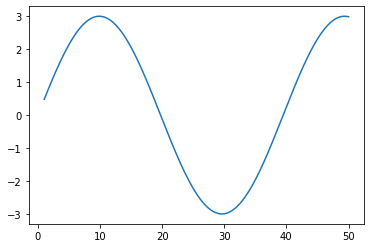

In [136]:
#3.2
# Generate  a  sinusoidal  wave  of  amplitude  equals  to  3  Volts,  with  sample  rate  of  20samples/second of a total duration 50 seconds
fs = 20
A = 3
#t  = 50
t = np.linspace(1, 50, 20*50)

#samples = np.arange(t * fs) / fs
signal_sinosoidal = A*np.sin(t/(2*np.pi))
#signal_sinosoidal = A*np.sin(2 * np.pi*samples) 
plt.plot(t, signal_sinosoidal)


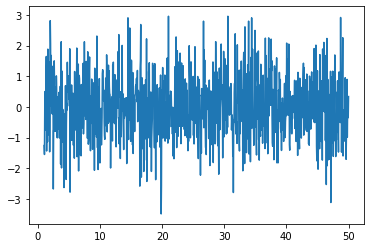

In [137]:
# Generate random noise that is sampled from a standard normal distribution.
noise = np.random.normal(0,1,1000) #n : number of elements in array
plt.plot(t, noise)


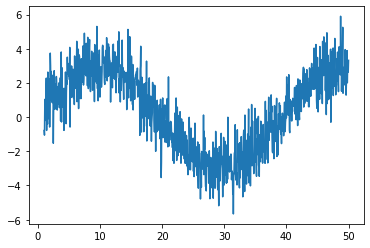

In [138]:
# Generate a noisy signal from above, based on the assumption that the noise is additive.
noisy_signal = signal_sinosoidal + noise 
plt.plot(t, noisy_signal)


/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


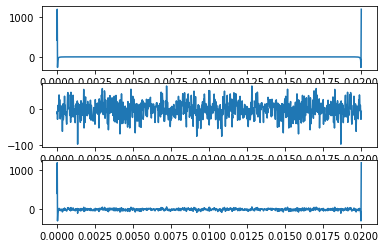

In [139]:
# Generate the Fourier spectrum (i.e.  magnitude) of the three above (item number 1, 2,3) and plot them against frequency.
signal_fft = np.fft.fft(signal_sinosoidal)
noise_fft = np.fft.fft(noise)
noisy_signal_fft = np.fft.fft(noisy_signal)
N = 1000
freq = np.linspace(0.0, 1.0/(50), N)

fig, ax = plt.subplots(3)

ax[0].plot(freq, signal_fft)


ax[1].plot(freq, noise_fft)


ax[2].plot(freq, noisy_signal_fft)


In [140]:
coeff  = weiner_filter_coefficient(noisy_signal, noise , 101)
coeff


array([[ 0.02295358],
       [-0.39153803],
       [-0.7456531 ],
       [ 0.14078742],
       [-0.61766682],
       [ 3.0898881 ],
       [ 1.67980833],
       [-1.34032915],
       [-3.54386134],
       [-3.30545666],
       [ 1.18443603],
       [ 3.1866515 ],
       [ 0.89367871],
       [-1.07176347],
       [-2.06098954],
       [-0.86472977],
       [ 2.2435623 ],
       [ 1.61917698],
       [ 0.58176362],
       [ 0.3789374 ],
       [ 1.53687445],
       [ 2.55557308],
       [ 2.67292204],
       [ 1.19896632],
       [-4.31544129],
       [-3.62296776],
       [-0.78211429],
       [ 2.53390612],
       [ 2.08608192],
       [-0.43300065],
       [-5.49417593],
       [-6.27655061],
       [-1.29198739],
       [ 2.5160023 ],
       [ 5.23488404],
       [ 1.36491517],
       [-2.64352239],
       [-0.4261874 ],
       [ 1.18957388],
       [ 0.9284053 ],
       [-3.128201  ],
       [-1.44990734],
       [-0.62616292],
       [ 5.07963196],
       [ 5.44595236],
       [ 1

In [ ]:
#TO-DO
#Convolution of noisy signal with H to obtain filtered output in time and frequency domain
# Compute  the  Wiener  filter  coefficients  using  the  function  that  you  have  written  insection 3.1 (use M = 101),  and obtain the reconstructed / filtered signal in time aswell  as  in  frequency  domain


In [141]:
# Used In built wiener filter just for reference 
from scipy.signal.signaltools import wiener
filtered_signal = wiener(noisy_signal)

filtered_signal_freq = wiener(noisy_signal_fft)



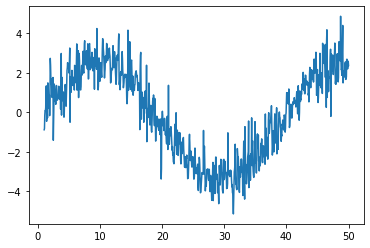

In [142]:
plt.plot(t, filtered_signal)


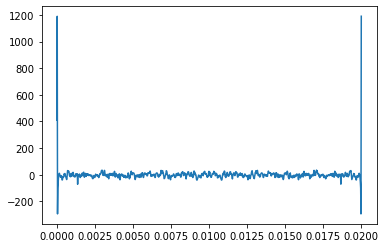

In [143]:
plt.plot(freq, filtered_signal_freq)


In [144]:
#  Plot  the  three  results  obtained  in  item  number  6  (i.e.   Wiener  filter  coefficients,  fil-tered signal in time domain, and filtered signal in frequency domain) separately withproperly labelled axes and titles.  The plot in frequency domain should also follow therequirement of item number 5.  How do you interpret your result?3 